#Python pretty plot classes, seaborn and pygal
http://pbpython.com/visualization-tools-1.html

This example notebook shows off the different vizualization types and styles avaliable in python within an ipython notebook.

First, we show some simple matplotlib/pylab functionality, then we play around with styles, try pygal and finally show the hilarious xkcd style.

At the top we need to import the libraries:

In [1]:
%pylab inline
%matplotlib inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


And now we need a dataset ...

In [2]:
import pandas.rpy.common as rcom
iris = rcom.load_data('iris')
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


## A simple matplotlib/pandas default plot will look like:
see http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [3]:
def simpplot():
    """
    Very basic plotting functions from pandas and matplotlib
    """
    fig1=plt.figure(figsize=(5,5))
    ax1=fig1.add_subplot(1,1,1)
    ax1.scatter(iris["Sepal.Length"],iris["Sepal.Width"])
    fig2=plt.figure(figsize=(7,7))
    ax2=fig2.add_subplot(1,1,1)
    ar=pd.tools.plotting.scatter_matrix(iris,ax=ax2)
    return fig1,fig2,ar,ax1,ax2

/opt/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:3218: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


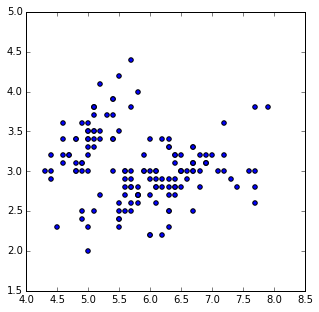

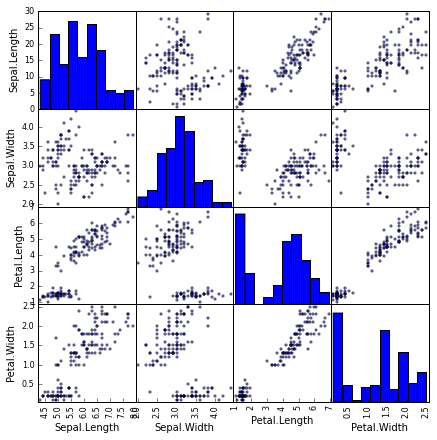

In [4]:
f=simpplot()

#try different matplotlib styles
see http://matplotlib.org/users/style_sheets.html

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


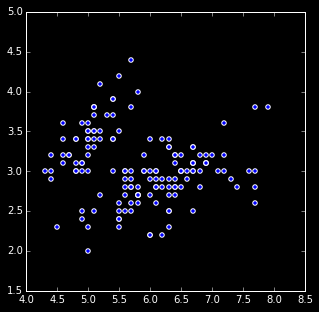

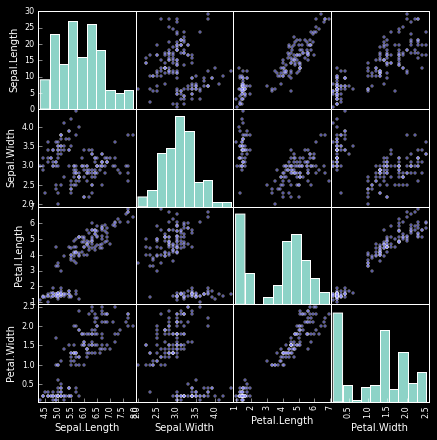

In [5]:
print plt.style.available
plt.style.use(['dark_background'])
f=simpplot()

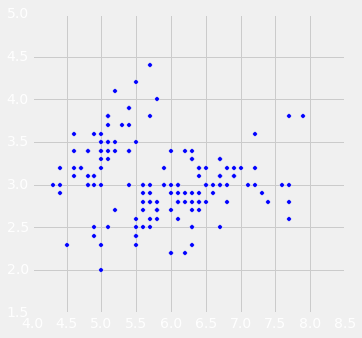

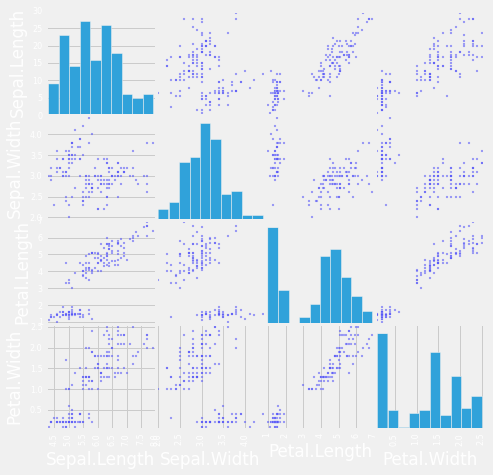

In [6]:
plt.style.use(['fivethirtyeight'])
f=simpplot()

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


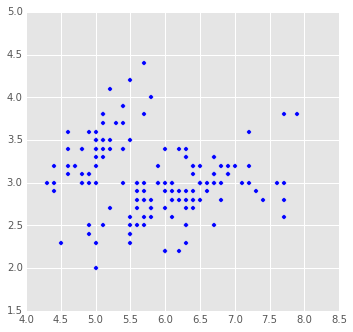

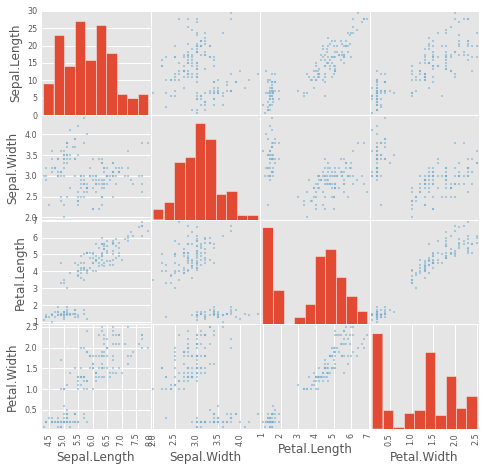

In [7]:
print plt.style.available
plt.style.use(['ggplot'])
f=simpplot()

# seaborn
see: http://stanford.edu/~mwaskom/software/seaborn/

Seaborn provides quite a few different functions, and the default styles are often prettier than bare matplotlib

In [8]:
import seaborn
print [s for s in dir(seaborn) if not s.startswith('_')]

['ClusterGrid', 'FacetGrid', 'Grid', 'JointGrid', 'LinearSegmentedColormap', 'PairGrid', 'algo', 'algorithms', 'axes_style', 'axes_ticklabels_overlap', 'axis_ticklabels_overlap', 'axisgrid', 'axlabel', 'barplot', 'blend_palette', 'boxplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'ci', 'ci_to_errsize', 'clustermap', 'coefplot', 'color_palette', 'colorsys', 'copy', 'corrplot', 'cubehelix_palette', 'cycle', 'dark_palette', 'dendrogram', 'desaturate', 'despine', 'distance', 'distplot', 'distributions', 'diverging_palette', 'division', 'external', 'factorplot', 'gridspec', 'heatmap', 'hierarchy', 'hls_palette', 'husl', 'husl_palette', 'inspect', 'interactplot', 'interpolate', 'iqr', 'itertools', 'jointplot', 'kdeplot', 'light_palette', 'linearmodels', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'mplcol', 'np', 'offset_spines', 'pairplot', 'palettes', 'palplot', 'pd', 'perc

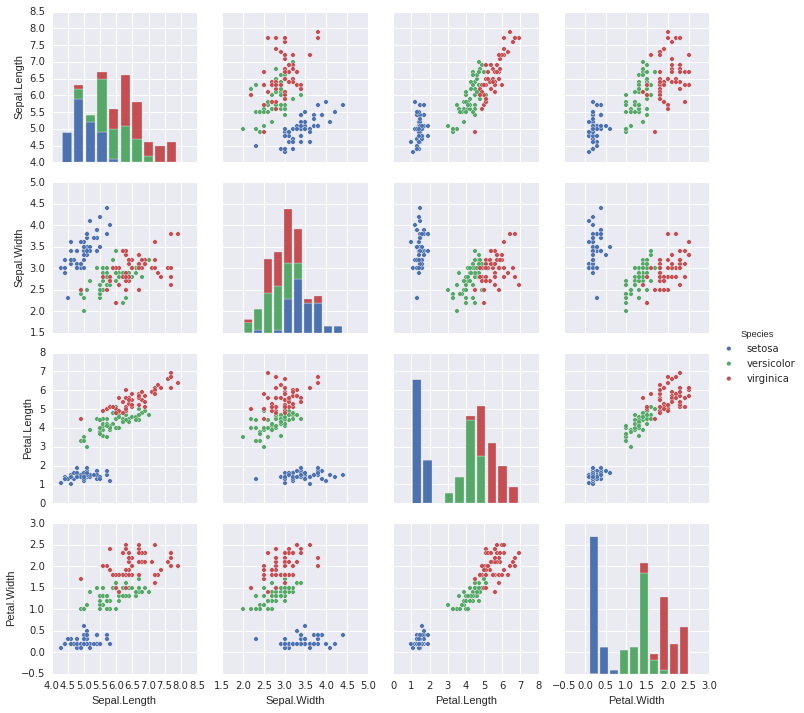

In [9]:
seaborn.pairplot(iris, hue="Species", size=2.5)

# pygal
see http://pygal.org/

Pygal draws svgs which your browser can display natively, with hoverover text and limited interaction.

Bar charts, Line charts, XY charts, Pie charts, Radar charts, Box plot
Dot charts, Pyramid charts, Funnel charts, Gauge charts, Worldmap charts, Country charts

In [10]:
import pygal

A simple histogram with matplotlib would look like:

<Container object of 10 artists>

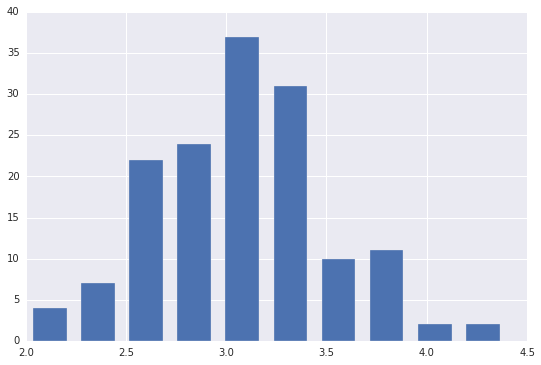

In [11]:
hist,bins=numpy.histogram(iris["Sepal.Width"])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center,hist,align='center',width=width)

In [12]:
from IPython.display import SVG, HTML
def ptohtml(p):
    """
    Function to render svg as HTML, and then embed in IPython notebook display
    """
    html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""
    f=html_pygal.format(pygal_render=p.render())
    #eliminate non-ascii characters ...
    f=str(''.join([s for s in f if ord(s)<128]))
    #print unique(sorted(f))
    return HTML(f)

In [13]:
bar_chart=pygal.Bar(width=1200, height=600,
                      legend_at_bottom=True, human_readable=True,
                      title="somedata", x_labels=map(str, center))
bar_chart.add("Something",hist)
ptohtml(bar_chart)

In [14]:
line_chart = pygal.StackedLine(fill=True, width=1200)
line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add('Firefox', [None, None, 0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
line_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
line_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
line_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])

ptohtml(line_chart)

# XKCD style
See: http://xkcd.com/1520/
It makes everything kinda funny

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'Humor Sans', u'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


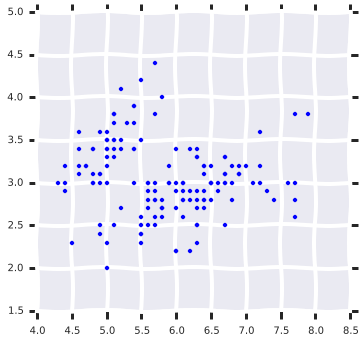

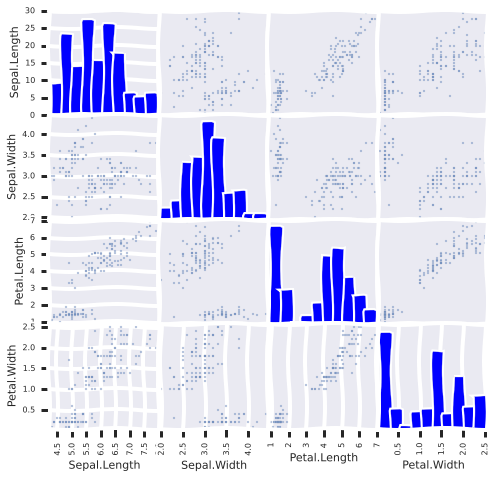

In [15]:
plt.xkcd()
f=simpplot()